In [1]:
# Anova - part 2

In [3]:
# load libs
%matplotlib inline

from __future__ import print_function
from statsmodels.compat import urlopen
import numpy as np
np.set_printoptions(precision=4, suppress=True)
import statsmodels.api as sm
import pandas as pd
pd.set_option("display.width", 100)
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Minority Employment Data

In [4]:
try:
    jobtest_table = pd.read_table('jobtest.table')
except:  # don't have data already
    url = 'http://stats191.stanford.edu/data/jobtest.table'
    jobtest_table = pd.read_table(url)

In [5]:
jobtest_table.head()

,TEST,MINORITY,JPERF
0,0.28,1,1.83
1,0.97,1,4.59
2,1.25,1,2.97
3,2.46,1,8.14
4,2.51,1,8.00


In [11]:
jobtest_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
TEST        20 non-null float64
MINORITY    20 non-null int64
JPERF       20 non-null float64
dtypes: float64(2), int64(1)
memory usage: 560.0 bytes


In [6]:
factor_group = jobtest_table.groupby(['MINORITY'])

In [10]:
factor_group.head(20) # all the obs

,TEST,MINORITY,JPERF
0,0.28,1,1.83
1,0.97,1,4.59
2,1.25,1,2.97
3,2.46,1,8.14
4,2.51,1,8.00
5,1.17,1,3.30
6,1.78,1,7.53
7,1.21,1,2.03
8,1.63,1,5.00
9,1.98,1,8.04


In [14]:
for factor, group in factor_group:
    print (factor, group)

0     TEST  MINORITY  JPERF
10  2.36         0   3.25
11  2.11         0   5.30
12  0.45         0   1.39
13  1.76         0   4.69
14  2.09         0   6.56
15  1.50         0   3.00
16  1.25         0   5.85
17  0.72         0   1.90
18  0.42         0   3.85
19  1.53         0   2.95
1    TEST  MINORITY  JPERF
0  0.28         1   1.83
1  0.97         1   4.59
2  1.25         1   2.97
3  2.46         1   8.14
4  2.51         1   8.00
5  1.17         1   3.30
6  1.78         1   7.53
7  1.21         1   2.03
8  1.63         1   5.00
9  1.98         1   8.04


Text(0,0.5,'JPERF')

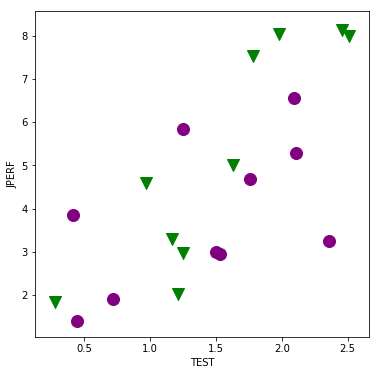

In [12]:
fig, ax = plt.subplots(figsize=(6,6))
colors = ['purple', 'green']
markers = ['o', 'v']
for factor, group in factor_group:
    ax.scatter(group['TEST'], group['JPERF'], color=colors[factor],
                marker=markers[factor], s=12**2)
ax.set_xlabel('TEST')
ax.set_ylabel('JPERF')

In [15]:
# simple linear model
min_lm = ols('JPERF ~ TEST', data=jobtest_table).fit()
print(min_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  JPERF   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     19.25
Date:                Fri, 15 Feb 2019   Prob (F-statistic):           0.000356
Time:                        09:56:09   Log-Likelihood:                -36.614
No. Observations:                  20   AIC:                             77.23
Df Residuals:                      18   BIC:                             79.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0350      0.868      1.192      0.2

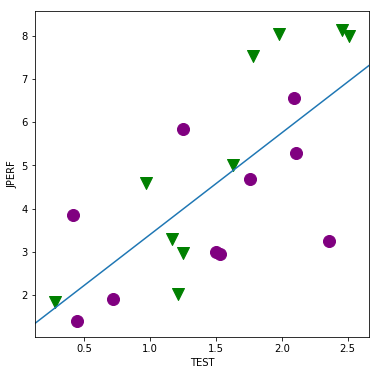

In [16]:
fig, ax = plt.subplots(figsize=(6,6));
for factor, group in factor_group:
    ax.scatter(group['TEST'], group['JPERF'], color=colors[factor],
                marker=markers[factor], s=12**2)

ax.set_xlabel('TEST')
ax.set_ylabel('JPERF')
fig = abline_plot(model_results = min_lm, ax=ax)

In [17]:
# with interactions
min_lm2 = ols('JPERF ~ TEST + TEST:MINORITY', data=jobtest_table).fit()

print(min_lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  JPERF   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     14.59
Date:                Fri, 15 Feb 2019   Prob (F-statistic):           0.000204
Time:                        09:58:39   Log-Likelihood:                -33.891
No. Observations:                  20   AIC:                             73.78
Df Residuals:                      17   BIC:                             76.77
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.1211      0.780      1.437

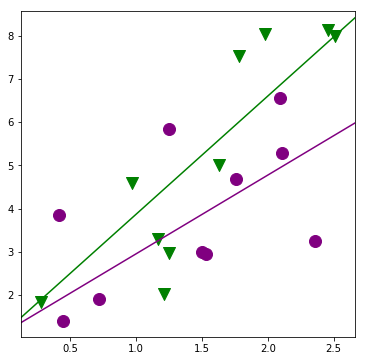

In [18]:
fig, ax = plt.subplots(figsize=(6,6));
for factor, group in factor_group:
    ax.scatter(group['TEST'], group['JPERF'], color=colors[factor],
                marker=markers[factor], s=12**2)

fig = abline_plot(intercept = min_lm2.params['Intercept'],
                 slope = min_lm2.params['TEST'], ax=ax, color='purple');
fig = abline_plot(intercept = min_lm2.params['Intercept'],
        slope = min_lm2.params['TEST'] + min_lm2.params['TEST:MINORITY'],
        ax=ax, color='green');

In [19]:
min_lm3 = ols('JPERF ~ TEST + MINORITY', data = jobtest_table).fit()
print(min_lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  JPERF   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     11.38
Date:                Fri, 15 Feb 2019   Prob (F-statistic):           0.000731
Time:                        09:59:39   Log-Likelihood:                -35.390
No. Observations:                  20   AIC:                             76.78
Df Residuals:                      17   BIC:                             79.77
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6120      0.887      0.690      0.5

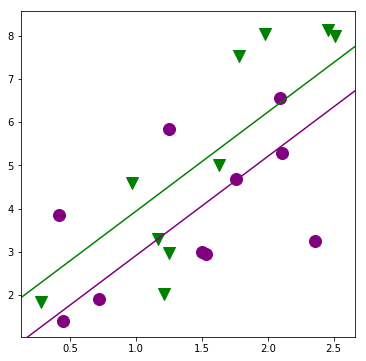

In [20]:
# parallel, not significantly different p-value = 0.155 in table above
fig, ax = plt.subplots(figsize=(6,6));
for factor, group in factor_group:
    ax.scatter(group['TEST'], group['JPERF'], color=colors[factor],
                marker=markers[factor], s=12**2)

fig = abline_plot(intercept = min_lm3.params['Intercept'],
                 slope = min_lm3.params['TEST'], ax=ax, color='purple');
fig = abline_plot(intercept = min_lm3.params['Intercept'] + min_lm3.params['MINORITY'],
        slope = min_lm3.params['TEST'], ax=ax, color='green');

In [21]:
min_lm4 = ols('JPERF ~ TEST * MINORITY', data = jobtest_table).fit()
print(min_lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  JPERF   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     10.55
Date:                Fri, 15 Feb 2019   Prob (F-statistic):           0.000451
Time:                        10:02:16   Log-Likelihood:                -32.971
No. Observations:                  20   AIC:                             73.94
Df Residuals:                      16   BIC:                             77.92
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.0103      1.050      1.914

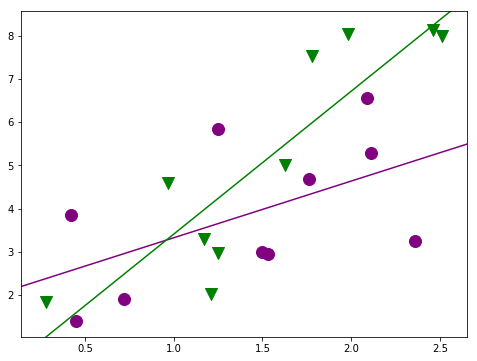

In [22]:
fig, ax = plt.subplots(figsize=(8,6));
for factor, group in factor_group:
    ax.scatter(group['TEST'], group['JPERF'], color=colors[factor],
                marker=markers[factor], s=12**2)

fig = abline_plot(intercept = min_lm4.params['Intercept'],
                 slope = min_lm4.params['TEST'], ax=ax, color='purple');
fig = abline_plot(intercept = min_lm4.params['Intercept'] + min_lm4.params['MINORITY'],
        slope = min_lm4.params['TEST'] + min_lm4.params['TEST:MINORITY'],
        ax=ax, color='green');

In [25]:
# is there any effect of MINORITY on slope or intercept?
# min_lm = ols('JPERF ~ TEST', data=jobtest_table).fit()
# min_lm4 = ols('JPERF ~ TEST * MINORITY', data = jobtest_table).fit()
table5 = anova_lm(min_lm, min_lm4)
print(table5)

   df_resid        ssr  df_diff    ss_diff         F    Pr(>F)
0      18.0  45.568297      0.0        NaN       NaN       NaN
1      16.0  31.655473      2.0  13.912824  3.516061  0.054236


In [26]:
# is there any effect of MINORITY on intercept
table6 = anova_lm(min_lm, min_lm3)
print(table6)

   df_resid        ssr  df_diff   ss_diff         F    Pr(>F)
0      18.0  45.568297      0.0       NaN       NaN       NaN
1      17.0  40.321546      1.0  5.246751  2.212087  0.155246


In [27]:
# is there any effect of MINORITY on slope
table7 = anova_lm(min_lm, min_lm2)
print(table7)

   df_resid        ssr  df_diff    ss_diff         F    Pr(>F)
0      18.0  45.568297      0.0        NaN       NaN       NaN
1      17.0  34.707653      1.0  10.860644  5.319603  0.033949


In [28]:
# is it just the slope or both?
table8 = anova_lm(min_lm2, min_lm4)
print(table8)

   df_resid        ssr  df_diff  ss_diff         F    Pr(>F)
0      17.0  34.707653      0.0      NaN       NaN       NaN
1      16.0  31.655473      1.0  3.05218  1.542699  0.232115


In [29]:
# https://www.statsmodels.org/stable/examples/notebooks/generated/interactions_anova.html